Extracción de la tasa de interés de yfinance

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
tasa_interes = yf.Ticker("^TNX")

In [3]:
tasa_hist= tasa_interes.history(period="20y")

In [4]:
tasa_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-03-17 00:00:00-05:00,3.651,3.823,3.640,3.816,0,0.0,0.0
2003-03-18 00:00:00-05:00,3.852,3.912,3.797,3.898,0,0.0,0.0
2003-03-19 00:00:00-05:00,3.944,3.988,3.913,3.965,0,0.0,0.0
2003-03-20 00:00:00-05:00,3.961,4.044,3.910,4.006,0,0.0,0.0
2003-03-21 00:00:00-05:00,4.007,4.117,3.998,4.095,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-13 00:00:00-04:00,3.505,3.547,3.419,3.515,0,0.0,0.0
2023-03-14 00:00:00-04:00,3.590,3.685,3.556,3.638,0,0.0,0.0
2023-03-15 00:00:00-04:00,3.526,3.530,3.388,3.492,0,0.0,0.0


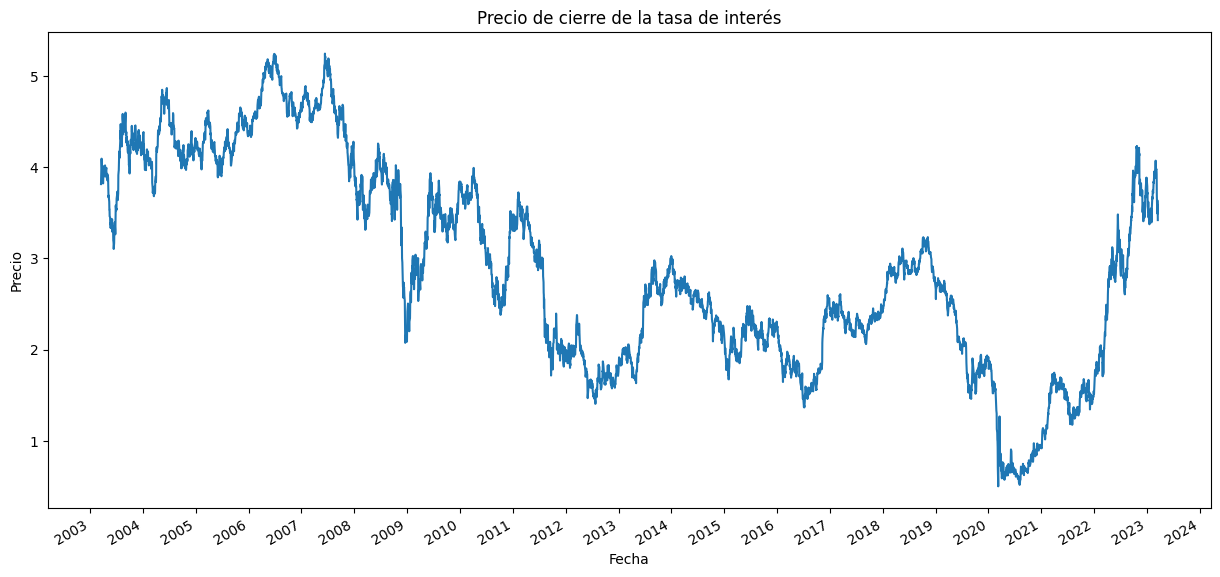

In [6]:
# Graficar los precios de cierre ajustado del S&P500
fig, ax = plt.subplots(figsize=(15, 7))
tasa_hist['Close'].plot(ax=ax)

# Configurar formato de las etiquetas del eje x para mostrar todos los años
years = mdates.YearLocator()   # localizar años
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Etiquetas y títulos del gráfico
plt.title("Precio de cierre de la tasa de interés")
plt.ylabel("Precio")
plt.xlabel("Fecha")

# Mostrar el gráfico
plt.show()

Extracción del IPC de USA a través de la pagina de la Oficina de Estadísticas Laborales (BLS) del gobierno de los EE. UU. https://www.bls.gov/developers/api_signature.htm#single

In [9]:
import requests
import json
import prettytable

In [15]:
import pandas as pd

In [10]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
    
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

El código para el IPC es SUUR0000SA0 de acuerdo con la información de https://www.bls.gov/help/hlpforma.htm#AP página de EEUU

In [13]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"2011", "endyear":"2023"})
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
    
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.csv','w')
    output.write (x.get_string())
    output.close()

In [21]:
df = pd.read_csv("CUUR0000SA0L1E.csv", sep="|")

In [23]:
df

,Unnamed: 0,series id,year,period,value,footnotes,Unnamed: 6
0,NaN,CUUR0000SA0L1E,2020,M12,269.226,,NaN
1,NaN,CUUR0000SA0L1E,2020,M11,269.473,,NaN
2,NaN,CUUR0000SA0L1E,2020,M10,269.328,,NaN
3,NaN,CUUR0000SA0L1E,2020,M09,269.054,,NaN
4,NaN,CUUR0000SA0L1E,2020,M08,268.756,,NaN
...,...,...,...,...,...,...,...
115,NaN,CUUR0000SA0L1E,2011,M05,224.534,,NaN
116,NaN,CUUR0000SA0L1E,2011,M04,224.118,,NaN
117,NaN,CUUR0000SA0L1E,2011,M03,223.690,,NaN
118,NaN,CUUR0000SA0L1E,2011,M02,223.011,,NaN


Faltaría la extracción del IPC de la API del banco mundial. Hay que revisar si es muy actual y si no, utilizar yfinance con el simbolo 

iShares TIPS Bond ETF (TIP)

Que aunque no es el índice como tal, sí puede funcionar como información latente del comportamiento de la inflación.

In [1]:
import wbgapi as wb

In [2]:
data = wb.series.info()

In [5]:
data = wb.series.info(q="inflation")
data

id,value
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
,3 elements


<function matplotlib.pyplot.show(close=None, block=None)>

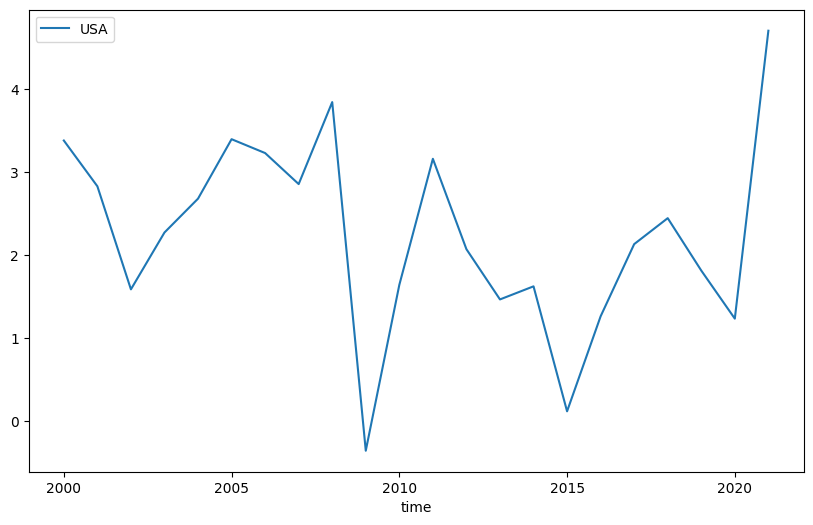

In [6]:
wb.data.DataFrame("FP.CPI.TOTL.ZG", "USA", range(2000,2024), index="time", numericTimeKeys=True, labels=True).plot(figsize=(10,6))
plt.show

In [7]:
grafica = wb.data.DataFrame("FP.CPI.TOTL.ZG", "USA", range(2000,2024), index="time", numericTimeKeys=True, labels=True)

In [8]:
grafica

,Time,USA
time,,
2021,2021,4.697859
2020,2020,1.233584
2019,2019,1.812210
2018,2018,2.442583
2017,2017,2.130110
2016,2016,1.261583
2015,2015,0.118627
2014,2014,1.622223
2013,2013,1.464833
